In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display
import seaborn as sns

print('Esperamos trabalhar no diretório')
print(os.getcwd())



Esperamos trabalhar no diretório
c:\Users\bebec\OneDrive\Área de Trabalho\INSPER\CDADOS\CD22-2\Projeto2\22-2a-cd-p2-grupo_bexcamrefe


INTRODUÇÃO
Explicar objetivo do trabalho
Apresentar banco de dados
Definição de Target e Feature

Prever: A probabilidade de um voo americano em Janeiro vai ser cancelado.
Pergunta: Qual a probabilidade do meu voo ser cancelado de acordo com a sua cia aéra?

MINERAÇÃO DE DADOS
Limpeza do dataset

In [2]:
# FILTRANDO APENAS DADOS INTERESSANTES
dados_2019 = pd.read_csv('Jan_2019_ontime.csv', sep=',')
# manter: OP_CARRIER, ORIGIN, DESTINATION, CANCELLED, DIVERTED, DISTANCE

Novos_dados_2019 = dados_2019.loc[:,['OP_CARRIER','ORIGIN', 'DEST','CANCELLED','DISTANCE']]
Novos_dados_2019.head(5)

,OP_CARRIER,ORIGIN,DEST,CANCELLED,DISTANCE
0,9E,GNV,ATL,0.0,300.0
1,9E,MSP,CVG,0.0,596.0
2,9E,DTW,CVG,0.0,229.0
3,9E,TLH,ATL,0.0,223.0
4,9E,ATL,FSM,0.0,579.0


In [3]:
dados_2020 = pd.read_csv('Jan_2020_ontime.csv')
# manter: OP_CARRIER, ORIGIN, DESTINATION, CANCELLED, DIVERTED, DISTANCE

Novos_dados_2020 = dados_2020.loc[:,['OP_CARRIER','ORIGIN', 'DEST','CANCELLED','DISTANCE']]
Novos_dados_2020.head(5)

,OP_CARRIER,ORIGIN,DEST,CANCELLED,DISTANCE
0,EV,ORD,GRB,0.0,174.0
1,EV,TUL,ORD,0.0,585.0
2,EV,EWR,TYS,0.0,631.0
3,EV,BTR,IAH,0.0,253.0
4,EV,RIC,IAH,0.0,1157.0


In [4]:
Dados_gerais = pd.merge(Novos_dados_2020 , Novos_dados_2019, how = 'outer') # JUNTANDO AS DUAS BASES DE DADOS

Dados_gerais['OP_CARRIER'] = Dados_gerais['OP_CARRIER'].astype('category')
Dados_gerais['ORIGIN'] = Dados_gerais['ORIGIN'].astype('category')
Dados_gerais['DEST'] = Dados_gerais['DEST'].astype('category')
Dados_gerais['CANCELLED'] = Dados_gerais['CANCELLED'].astype('category')



In [5]:
Comparador = pd.read_csv('Pasta1.csv')
print(Comparador)

   OP_CARRIER                Airline Name
0          Dl             Delta Air Lines
1          AA     American Airlines Cargo
2          WN          Southwest Airlines
3          OO            SkyWest Airlines
4          UA       United Airlines Cargo
5          YX            Midwest Airlines
6          MQ                   Envoy air
7          B6                     JetBlue
8          9E                    Endeavor
9          AS             Alaska Airlines
10         YV               Mesa Airlines
11         NK             Spirit Airlines
12         EV  Atlatic Southeast Airlines
13         F9             FRONTIER FLIGHT
14         G4               Allegiant Air
15         HA           Hawaiian Airlines
16         OH     Comair Delta Connection


In [6]:
Dados_gerais['OP_CARRIER'].cat.categories = [' Endeavor','American Airlines Cargo','Alaska Airlines','JetBlue','Delta Air Lines','Atlatic Southeast Airlines','Frontier Flight','Allegiant Air','Hawaiian Airlines','Envoy Air','Spirit Airlines','Comair Delta Connection','SkyWest Airlines','United Airlines Cargo','Southwest Airlines','Mesa Airlines','Midwest Airlines']


In [7]:
Dados_gerais.head(5)


,OP_CARRIER,ORIGIN,DEST,CANCELLED,DISTANCE
0,Atlatic Southeast Airlines,ORD,GRB,0.0,174.0
1,Atlatic Southeast Airlines,ORD,GRB,0.0,174.0
2,Atlatic Southeast Airlines,ORD,GRB,0.0,174.0
3,Atlatic Southeast Airlines,ORD,GRB,0.0,174.0
4,Atlatic Southeast Airlines,ORD,GRB,0.0,174.0


In [8]:
Dados_gerais.dropna()

,OP_CARRIER,ORIGIN,DEST,CANCELLED,DISTANCE
0,Atlatic Southeast Airlines,ORD,GRB,0.0,174.0
1,Atlatic Southeast Airlines,ORD,GRB,0.0,174.0
2,Atlatic Southeast Airlines,ORD,GRB,0.0,174.0
3,Atlatic Southeast Airlines,ORD,GRB,0.0,174.0
4,Atlatic Southeast Airlines,ORD,GRB,0.0,174.0
...,...,...,...,...,...
69838882,Midwest Airlines,CMH,RDU,1.0,362.0
69838883,United Airlines Cargo,FLL,CLE,1.0,1062.0
69838884,United Airlines Cargo,IAH,SAV,0.0,851.0
69838885,United Airlines Cargo,PSP,ORD,1.0,1652.0


In [9]:
# CHECANDO SE TEMOS VALORES NULOS
Cancelados = Dados_gerais[Dados_gerais['CANCELLED'] == 1.0]
Nao_cancelados = Dados_gerais[Dados_gerais['CANCELLED'] == 0.0]
#Voo_cancelados = Treinamento.loc[Cancelados,:]
#print(len(Voo_cancelados))
print(Cancelados.isnull().sum())
print(len(Cancelados))
print(Nao_cancelados.isnull().sum())
print(len(Nao_cancelados))
# --> está certo, resultados esperados pois voos cancelados não atrasam e não cancelados podem ainda assim atrasar.


OP_CARRIER    0
ORIGIN        0
DEST          0
CANCELLED     0
DISTANCE      0
dtype: int64
55947
OP_CARRIER    0
ORIGIN        0
DEST          0
CANCELLED     0
DISTANCE      0
dtype: int64
69782940


,count,mean,std,min,25%,50%,75%,max
CANCELLED,,,,,,,,
0.0,69782940.0,731.667,564.053,31.0,328.0,581.0,967.0,5095.0
1.0,55947.0,564.074,404.154,31.0,264.0,423.0,742.0,4475.0


,count,mean,std,min,25%,50%,75%,max
CANCELLED,,,,,,,,
True,55947.0,564.074,404.154,31.0,264.0,423.0,742.0,4475.0


,count,mean,std,min,25%,50%,75%,max
CANCELLED,,,,,,,,
False,69782940.0,731.667,564.053,31.0,328.0,581.0,967.0,5095.0


Text(0, 0.5, 'Frequência absoluta')

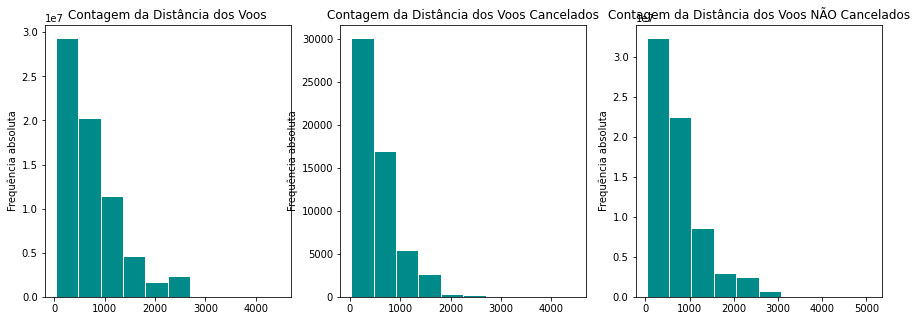

In [10]:
# Nosso Target --> qualitativo (SIM/NÃO --> 1.0/0.0 --> CANCELADO/NÃO CANCELADO), por isso temos que 
# Estudar as relações com base em gráficos de QualitativasXQuantitativas e QualitativasXQualitativas

# CANCELADOS X DISTANCIA --> único caso qualixquant do nosso df
display(Dados_gerais.groupby(by= [Dados_gerais.CANCELLED]).DISTANCE.describe().round(3))
display(Cancelados.groupby(by= [Cancelados.CANCELLED == 1.0]).DISTANCE.describe().round(3))
display(Nao_cancelados.groupby(by= [Nao_cancelados.CANCELLED == 1.0]).DISTANCE.describe().round(3))

amplitude = Dados_gerais.DISTANCE.max()-Dados_gerais.DISTANCE.min()
amplitude_faixa= amplitude/ 10
faixa= np.arange(30, 5100.0, amplitude_faixa )

amplitude_cancelados = Cancelados.DISTANCE.max()-Cancelados.DISTANCE.min()
amplitude_faixa_cancelados = amplitude_cancelados / 10
faixa_canc = np.arange(30, 4480.0, amplitude_faixa_cancelados )

amplitude_nao_cancelados = Nao_cancelados.DISTANCE.max()-Nao_cancelados.DISTANCE.min()
amplitude_faixa_nao_cancelados = amplitude_nao_cancelados / 10
faixa_nao_canc = np.arange(30, 5100.0, amplitude_faixa_nao_cancelados )


plt.figure(figsize=(15, 5))
# GRÁFICO DA DISTÂNCIA POR VOO
plt.subplot(131)
plt.hist(Dados_gerais.DISTANCE, bins=faixa_canc, color='darkcyan', edgecolor='white')
plt.title('Contagem da Distância dos Voos')
plt.ylabel('Frequência absoluta')
# GRÁFICO CANCELADOS
plt.subplot(132)
plt.hist(Cancelados.DISTANCE, bins=faixa_canc, color='darkcyan', edgecolor='white')
plt.title('Contagem da Distância dos Voos Cancelados')
plt.ylabel('Frequência absoluta')
# GRÁFICO NÃO CANCELADOS
plt.subplot(133)
plt.hist(Nao_cancelados.DISTANCE, bins=faixa_nao_canc, color='darkcyan', edgecolor='white')
plt.title('Contagem da Distância dos Voos NÃO Cancelados')
plt.ylabel('Frequência absoluta')



CANCELLED,0.0,1.0
OP_CARRIER,,
Envoy Air,99.6,0.4
SkyWest Airlines,99.7,0.3
Atlatic Southeast Airlines,99.8,0.2
All,99.9,0.1
Mesa Airlines,99.9,0.1
Southwest Airlines,99.9,0.1
Frontier Flight,99.9,0.1
Allegiant Air,99.9,0.1
Midwest Airlines,99.9,0.1


None


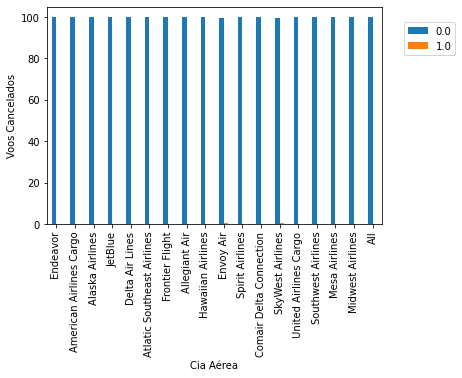

CANCELLED,0.0,1.0
DEST,,
ART,74.2,25.8
OGS,86.6,13.4
ATY,90.3,9.7
HVN,94.4,5.6
CMX,94.6,5.4
...,...,...
OAJ,100.0,0.0
OGD,100.0,0.0
OGG,100.0,0.0


None


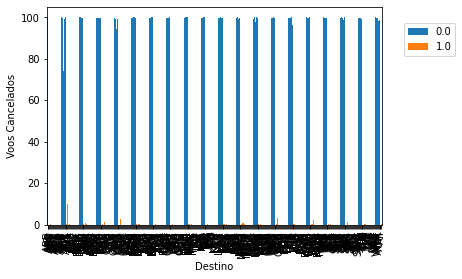

CANCELLED,0.0,1.0
ORIGIN,,
ART,75.8,24.2
OGS,83.1,16.9
SUN,89.5,10.5
ATY,90.3,9.7
RIW,94.1,5.9
...,...,...
FAI,100.0,0.0
EYW,100.0,0.0
EWR,100.0,0.0


None


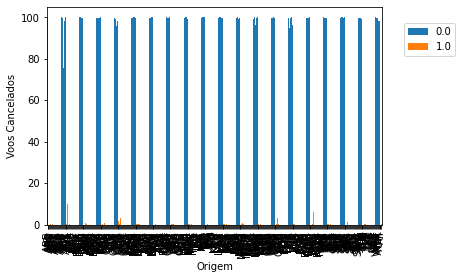

In [11]:
# CRUZAMENTO DE QUALITATIVAS CM QUALITATIVAS
# FAZER TABELA DE FREQUENCIAS + GRÁFICOS DE BARRA
# PLOTAR UM AO LADO DO OUTRO SE POSSÍVEL
# Cia X Cancelados
cia_canc = pd.crosstab(Dados_gerais['OP_CARRIER'], Dados_gerais['CANCELLED'],  normalize='index', margins=True).round(3)*100
cia_canc__ordenado = cia_canc.sort_values(0.0)
print(display(cia_canc__ordenado))
cia_canc.plot.bar()
plt.ylabel('Voos Cancelados')
plt.xlabel('Cia Aérea')
plt.legend(loc='center')
plt.legend(bbox_to_anchor=(1.05, 0.95)); # Coloca legenda para fora da janela gráfica
plt.show()

# Destino X Cancelados
dest_canc = pd.crosstab(Dados_gerais['DEST'], Dados_gerais['CANCELLED'], normalize='index',margins=True).round(3)*100
dest_canc_ordenado = dest_canc.sort_values(0.0)
print(display(dest_canc_ordenado))
dest_canc.plot.bar()
plt.ylabel('Voos Cancelados')
plt.xlabel('Destino')
plt.legend(loc='center')
plt.legend(bbox_to_anchor=(1.05, 0.95)); # Coloca legenda para fora da janela gráfica
plt.show()

# Origem X Cancelados
org_canc = pd.crosstab(Dados_gerais['ORIGIN'], Dados_gerais['CANCELLED'], normalize='index',margins=True).round(3)*100
org_canc_ordenado = org_canc.sort_values(0.0)
print(display(org_canc_ordenado))
org_canc.plot.bar()
plt.ylabel('Voos Cancelados')
plt.xlabel('Origem')
plt.legend(loc='center')
plt.legend(bbox_to_anchor=(1.05, 0.95)); # Coloca legenda para fora da janela gráfica
plt.show()



In [12]:
# TESTE QUI-QUADRADO DE PEARSON - teste de independência entre variáveis ​​categóricas
# adotando alfa de significancia = 5% (0.05)
from scipy.stats import chi2_contingency
alpha = 0.05

# Dependendia do status do voo X CIA AREA 
stat, pcia, dof, expected = chi2_contingency(cia_canc)
print("p cia value is " + str(pcia))
if pcia <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independente da CIA aérea')

# Dependendia do status do voo X DESTINO
stat, pdest, dof, expected = chi2_contingency(dest_canc)
print("p dest value is " + str(pdest))
if pdest <= alpha:
    print('Destino é Dependente')
else:
    print('Independente do DESTINO')

# Dependendia do status do voo X ORIGEM
stat, porg, dof, expected = chi2_contingency(org_canc)
print("p dest value is " + str(porg))
if porg <= alpha:
    print('Dependente da Origem')
else:
    print('Independente da Origem')

p cia value is 0.9999674110933464
Independente da CIA aérea
p dest value is 0.0
Destino é Dependente
p dest value is 0.0
Dependente da Origem


MONTANDO O MODELO PREDITIVO
- aqui sim temos que dividir em uma parte de treinamento

In [13]:
Dados_gerais_00 = Dados_gerais 
Dados_gerais = Dados_gerais_00.sample(frac = 0.1)
# Creating dataframe with
# rest of the 50% values
rest_Dados_gerais = Dados_gerais_00.drop(Dados_gerais.index)

In [14]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

Dados_gerais = Dados_gerais.dropna()
Dados_gerais.head(5)

,OP_CARRIER,ORIGIN,DEST,CANCELLED,DISTANCE
32794146,Delta Air Lines,ATL,EWR,0.0,746.0
4911560,Southwest Airlines,DEN,SMF,0.0,909.0
3676581,Southwest Airlines,DAL,LGA,0.0,1381.0
24378779,Endeavor,BOS,CVG,0.0,752.0
35439711,Delta Air Lines,PHL,ATL,0.0,666.0


In [15]:
cat_vars = ['OP_CARRIER','ORIGIN', 'DEST']
for var in cat_vars:
    cat_list = 'var' + '_' + var
    cat_list = pd.get_dummies(Dados_gerais[var],prefix = var)
    Dados_gerais = Dados_gerais.join(cat_list)
     
data_vars=Dados_gerais.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [16]:
data_final=Dados_gerais[to_keep]
data_final.columns.values

MemoryError: Unable to allocate 4.70 GiB for an array with shape (723, 6983889) and data type uint8

In [ ]:
X = data_final.loc[:, data_final.columns != 'CANCELLED']
y = data_final.loc[:,['CANCELLED']]
y.value_counts()

CANCELLED
0.0          116764
1.0            2369
dtype: int64

In [ ]:
data_final.head(5)


,CANCELLED,DISTANCE,Ano,OP_CARRIER_ Endeavor,OP_CARRIER_American Airlines Cargo,OP_CARRIER_Alaska Airlines,OP_CARRIER_JetBlue,OP_CARRIER_Delta Air Lines,OP_CARRIER_Atlatic Southeast Airlines,OP_CARRIER_Frontier Flight,...,DEST_UIN,DEST_USA,DEST_VEL,DEST_VLD,DEST_VPS,DEST_WRG,DEST_XNA,DEST_XWA,DEST_YAK,DEST_YUM
235481,0.0,1464.0,2020,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
671106,0.0,370.0,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
383682,0.0,163.0,2020,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
658345,0.0,296.0,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1060909,0.0,771.0,2019,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y= os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['CANCELLED'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['CANCELLED']==0]))
print("Number of subscription",len(os_data_y[os_data_y['CANCELLED']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['CANCELLED']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['CANCELLED']==1])/len(os_data_X))

           DISTANCE          Ano  OP_CARRIER_ Endeavor  \
0        292.000000       2020.0                     0   
1        599.000000       2019.0                     0   
2       1069.000000       2020.0                     0   
3        554.000000       2020.0                     0   
4        457.000000       2019.0                     1   
...             ...          ...                   ...   
163455   258.524826       2019.0                     0   
163456   475.000000   2019.76572                     0   
163457   391.588605  2019.411395                     0   
163458  1521.000000  2019.952345                     0   
163459   631.684047  2019.315953                     0   

        OP_CARRIER_American Airlines Cargo  OP_CARRIER_Alaska Airlines  \
0                                        0                           0   
1                                        1                           0   
2                                        0                           0   
3      

In [ ]:

data_final_vars=data_final.columns.values.tolist()
y=['CANCELLED']
X=[i for i in data_final_vars if i not in y]

import statsmodels.api as sm
logit_model=sm.Logit(y_test,X_test)
result=logit_model.fit()
print(result.summary2())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data). The types seen wereCANCELLED    category
dtype: object and DISTANCE                              float64
Ano                                    object
OP_CARRIER_ Endeavor                    uint8
OP_CARRIER_American Airlines Cargo      uint8
OP_CARRIER_Alaska Airlines              uint8
                                       ...   
DEST_WRG                                uint8
DEST_XNA                                uint8
DEST_XWA                                uint8
DEST_YAK                                uint8
DEST_YUM                                uint8
Length: 725, dtype: object. The data was
       CANCELLED
186914       0.0
934787       0.0
756277       0.0
207762       0.0
23714        0.0
...          ...
935834       0.0
40508        0.0
93285        0.0
964025       0.0
553163       0.0

[35740 rows x 1 columns]
and
         DISTANCE   Ano  OP_CARRIER_ Endeavor  \
186914     448.0  2020                     1   
934787     489.0  2019                     0   
756277     528.0  2019                     0   
207762     370.0  2020                     0   
23714     1246.0  2020                     0   
...          ...   ...                   ...   
935834    1034.0  2019                     0   
40508     1024.0  2020                     0   
93285      268.0  2020                     0   
964025    1201.0  2019                     0   
553163    1124.0  2020                     0   

        OP_CARRIER_American Airlines Cargo  OP_CARRIER_Alaska Airlines  \
186914                                   0                           0   
934787                                   0                           0   
756277                                   0                           0   
207762                                   0                           0   
23714                                    0                           0   
...                                    ...                         ...   
935834                                   0                           0   
40508                                    0                           0   
93285                                    0                           0   
964025                                   0                           0   
553163                                   0                           0   

        OP_CARRIER_JetBlue  OP_CARRIER_Delta Air Lines  \
186914                   0                           0   
934787                   0                           0   
756277                   0                           0   
207762                   0                           0   
23714                    0                           0   
...                    ...                         ...   
935834                   0                           0   
40508                    0                           0   
93285                    0                           0   
964025                   0                           0   
553163                   0                           0   

        OP_CARRIER_Atlatic Southeast Airlines  OP_CARRIER_Frontier Flight  \
186914                                      0                           0   
934787                                      0                           0   
756277                                      0                           0   
207762                                      0                           0   
23714                                       0                           0   
...                                       ...                         ...   
935834                                      0                           0   
40508                                       0                           0   
93285                                       0                           0   
964025                                      0                           0   
553163                                      0                           0   

        OP_CARRIER_Allegiant Air  ...  DEST_UIN  DEST_USA  DEST_VEL  DEST_VLD  \
186914                         0  ...         0         0         0         0   
934787                         0  ...         0         0         0         0   
756277                         0  ...         0         0         0         0   
207762                         0  ...         0         0         0         0   
23714                          0  ...         0         0         0         0   
...                          ...  ...       ...       ...       ...       ...   
935834                         0  ...         0         0         0         0   
40508                          0  ...         0         0         0         0   
93285                          0  ...         0         0         0         0   
964025                         0  ...         0         0         0         0   
553163                         1  ...         0         0         0         0   

        DEST_VPS  DEST_WRG  DEST_XNA  DEST_XWA  DEST_YAK  DEST_YUM  
186914         0         0         0         0         0         0  
934787         0         0         0         0         0         0  
756277         0         0         0         0         0         0  
207762         0         0         0         0         0         0  
23714          0         0         0         0         0         0  
...          ...       ...       ...       ...       ...       ...  
935834         0         0         0         0         0         0  
40508          0         0         0         0         0         0  
93285          0         0         0         0         0         0  
964025         0         0         0         0         0         0  
553163         0         0         0         0         0         0  

[35740 rows x 725 columns]
before. After,
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
[[448.0 '2020' 1 ... 0 0 0]
 [489.0 '2019' 0 ... 0 0 0]
 [528.0 '2019' 0 ... 0 0 0]
 ...
 [268.0 '2020' 0 ... 0 0 0]
 [1201.0 '2019' 0 ... 0 0 0]
 [1124.0 '2020' 0 ... 0 0 0]].

In [ ]:
print(X)

['DISTANCE', 'Ano', 'OP_CARRIER_ Endeavor', 'OP_CARRIER_American Airlines Cargo', 'OP_CARRIER_Alaska Airlines', 'OP_CARRIER_JetBlue', 'OP_CARRIER_Delta Air Lines', 'OP_CARRIER_Atlatic Southeast Airlines', 'OP_CARRIER_Frontier Flight', 'OP_CARRIER_Allegiant Air', 'OP_CARRIER_Hawaiian Airlines', 'OP_CARRIER_Envoy Air', 'OP_CARRIER_Spirit Airlines', 'OP_CARRIER_Comair Delta Connection', 'OP_CARRIER_SkyWest Airlines', 'OP_CARRIER_United Airlines Cargo', 'OP_CARRIER_Southwest Airlines', 'OP_CARRIER_Mesa Airlines', 'OP_CARRIER_Midwest Airlines', 'ORIGIN_ABE', 'ORIGIN_ABI', 'ORIGIN_ABQ', 'ORIGIN_ABR', 'ORIGIN_ABY', 'ORIGIN_ACT', 'ORIGIN_ACV', 'ORIGIN_ACY', 'ORIGIN_ADK', 'ORIGIN_ADQ', 'ORIGIN_AEX', 'ORIGIN_AGS', 'ORIGIN_ALB', 'ORIGIN_ALO', 'ORIGIN_AMA', 'ORIGIN_ANC', 'ORIGIN_APN', 'ORIGIN_ART', 'ORIGIN_ASE', 'ORIGIN_ATL', 'ORIGIN_ATW', 'ORIGIN_ATY', 'ORIGIN_AUS', 'ORIGIN_AVL', 'ORIGIN_AVP', 'ORIGIN_AZA', 'ORIGIN_AZO', 'ORIGIN_BDL', 'ORIGIN_BET', 'ORIGIN_BFF', 'ORIGIN_BFL', 'ORIGIN_BFM', 'ORIGI

MODELO DE PREDIÇÃO - RESULTADOS

VALIDAÇÃO DOS RESULTADOS

In [ ]:
# código de validação de resultados 